# Data preparation

In [2]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [4]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

- I will convert the duration of the tracks from ms in minutes
- I will remove the popularity_confidence and feature_duration_ms columns.
- I will replace the missing values in the "time_signature" column with the median.
- I will replace the missing values in the "mode" column with the mode (most frequent value).
- I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


- I will convert the duration of the tracks from ms in minutes

In [68]:
df_copy = df.copy()
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
df_copy.head()

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.029333
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.400000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.558433
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.496667
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.127517


Questa da vedere meglio che ci sono troppi outliers

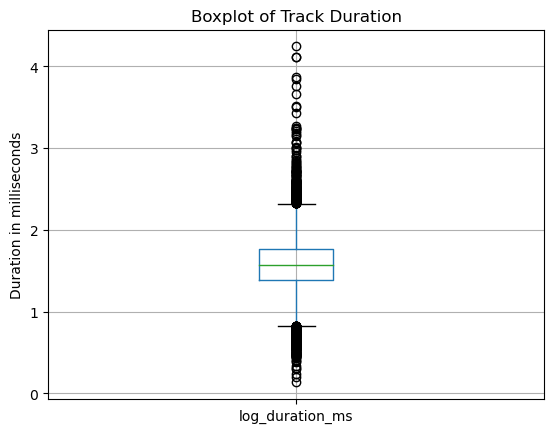

In [69]:
df_copy['log_duration_ms'] = np.log(df_copy['duration_m'] + 1)
# Plot the log-transformed data
df_copy.boxplot(column=['log_duration_ms'])
plt.title('Boxplot of Track Duration')
plt.ylabel('Duration in milliseconds')
plt.show()

I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [70]:
df_copy = df.sort_values(by='genre')
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,NaN,0.0401,0.181,0.000000,0.0837,0.226,135.951,293107,4.0,654.0,164.0,NaN,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,NaN,0.1450,0.456,0.811000,0.1040,0.963,166.689,194973,4.0,537.0,133.0,NaN,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,178428,4.0,304.0,76.0,0.376,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,238373,4.0,427.0,106.0,NaN,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,221893,4.0,317.0,78.0,NaN,1.279305,afrobeat


I will replace the missing values in the "mode" column with the mode (most frequent value).

In [71]:
df_copy['mode'] = df['mode'].fillna(df['mode'].mode()[0])

I will replace the missing values in the "time_signature" column with the median.

In [72]:
df_copy['time_signature'] = df['time_signature'].fillna(df['time_signature'].median())

I will remove the popularity_confidence and feature_duration_ms columns.

In [73]:
del df_copy['popularity_confidence']

In [74]:
del df_copy['features_duration_ms']

In [75]:
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1.0,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0,164.0,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1.0,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0,133.0,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0,76.0,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0,106.0,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0,78.0,1.279305,afrobeat


In [76]:
df_copy.shape

(15000, 22)